In [157]:
import pandas as pd
import numpy as np
FurnitureSalesData=pd.read_csv("C:/Users/Siddhali/OneDrive/Desktop/Ankit/IVY/Mentorness/ML Internship/Furniture Forescasting/Super_Store_data.csv",encoding='latin')
FurnitureSalesData.head(3)  

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


Problem Statement:The goal of this project is to develop a machine learning model to accurately forecast future sales 
for a furniture store based on historical data.

Target Variable=Sales

array([[<Axes: title={'center': 'Sales'}>]], dtype=object)

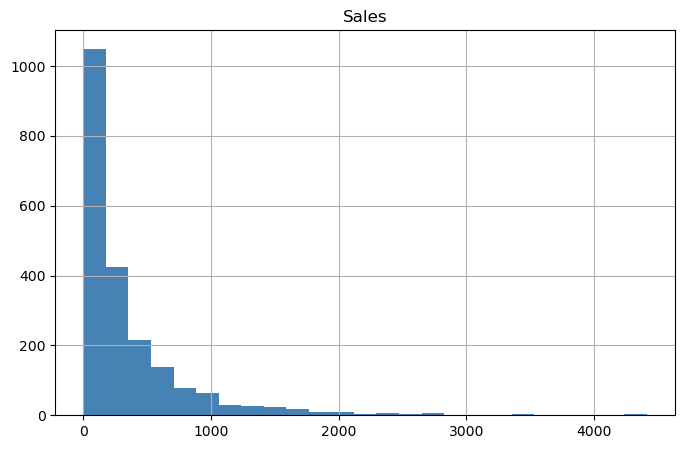

In [158]:
FurnitureSalesData.hist("Sales",bins=25,figsize=(8,5),color="steelblue")  

Basic Data Exploration 

In [121]:
FurnitureSalesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [122]:
FurnitureSalesData.describe(include="all") 

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,2121.000000,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121.000000,2121,2121,2121,2121,2121,2121.000000,2121.000000,2121.000000,2121.000000
unique,NaN,1764,889,960,4,707,707,3,1,371,48,NaN,4,375,1,4,380,NaN,NaN,NaN,NaN
top,NaN,US-2015-129007,09-05-2016,12-06-2017,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,California,NaN,West,FUR-FU-10004270,Furniture,Furnishings,KI Adjustable-Height Table,NaN,NaN,NaN,NaN
freq,NaN,4,10,10,1248,15,15,1113,2121,192,444,NaN,707,16,2121,957,18,NaN,NaN,NaN,NaN
mean,5041.643564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55726.556341,NaN,NaN,NaN,NaN,NaN,349.834887,3.785007,0.173923,8.699327
std,2885.740258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32261.888225,NaN,NaN,NaN,NaN,NaN,503.179145,2.251620,0.181547,136.049246
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,NaN,NaN,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22801.000000,NaN,NaN,NaN,NaN,NaN,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60505.000000,NaN,NaN,NaN,NaN,NaN,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90032.000000,NaN,NaN,NaN,NaN,NaN,435.168000,5.000000,0.300000,33.726600


In [123]:
FurnitureSalesData.nunique()

Row ID           2121
Order ID         1764
Order Date        889
Ship Date         960
Ship Mode           4
Customer ID       707
Customer Name     707
Segment             3
Country             1
City              371
State              48
Postal Code       454
Region              4
Product ID        375
Category            1
Sub-Category        4
Product Name      380
Sales            1636
Quantity           14
Discount           11
Profit           1777
dtype: int64

In [124]:
FurnitureSalesData.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [159]:
UselessColumns=['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Postal Code','Product ID']  

In [160]:
FurnitureSalesData.drop(UselessColumns,inplace=True,axis=1) 

In [161]:
FurnitureSalesData.columns 

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'Country', 'City',
       'State', 'Region', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [128]:
FurnitureSalesData.head(5)

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,11-08-2016,11-11-2016,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,11-08-2016,11-11-2016,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,10-11-2015,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,06-09-2014,6/14/2014,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,06-09-2014,6/14/2014,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [129]:
FurnitureSalesData.nunique()

Order Date       889
Ship Date        960
Ship Mode          4
Segment            3
Country            1
City             371
State             48
Region             4
Category           1
Sub-Category       4
Product Name     380
Sales           1636
Quantity          14
Discount          11
Profit          1777
dtype: int64

CategoricalVariable=['Ship Mode', 'Segment', 'Region', 'Sub-Category', 'Quantity', 'Discount','City', 'State', 'Product Name']

ContinousVariable=[ 'Quantity', 'Discount','Sales', 'Profit'] 

ExploratoryDataAnalysis

ContinousVariableAnalysis

In [130]:
FurnitureSalesData=FurnitureSalesData[FurnitureSalesData['Sales']<1000]

array([[<Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'Profit'}>]], dtype=object)

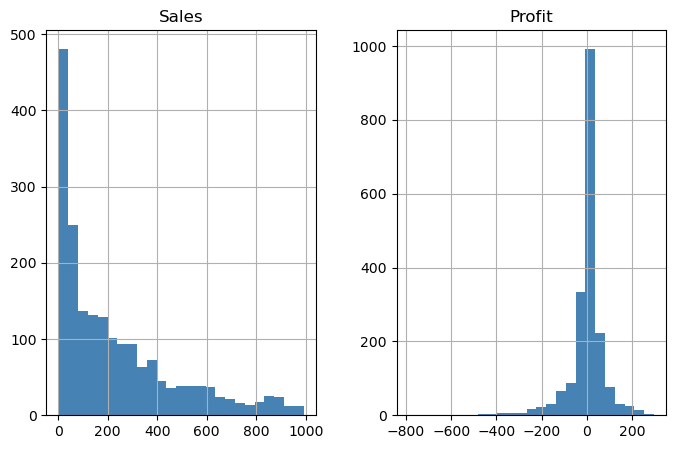

In [131]:
FurnitureSalesData.hist([ 'Sales', 'Profit'],figsize=(8,5),color='steelblue',bins=25)

array([[<Axes: title={'center': 'Quantity'}>]], dtype=object)

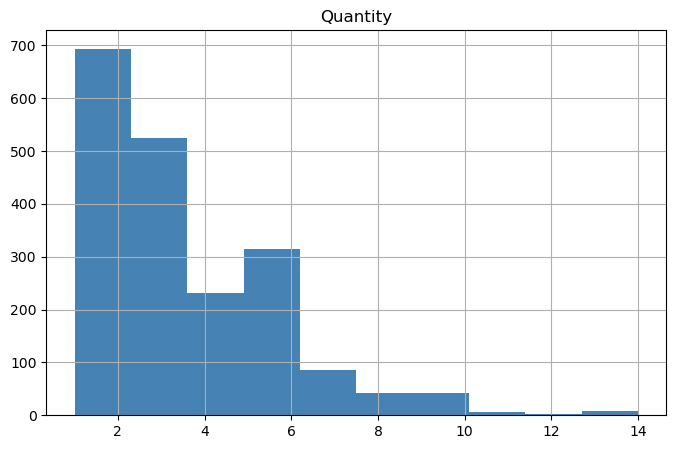

In [132]:
FurnitureSalesData.hist(['Quantity'],figsize=(8,5),color='steelblue',bins=10)

array([[<Axes: title={'center': 'Discount'}>]], dtype=object)

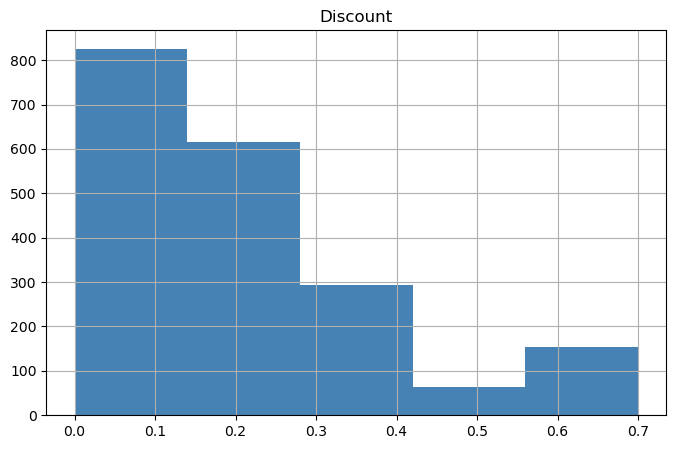

In [133]:
FurnitureSalesData.hist([  'Discount'],figsize=(8,5),color='steelblue',bins=5)

C:\Users\Siddhali\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 136 (\x88) missing from current font.
  func(*args, **kwargs)
C:\Users\Siddhali\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 136 (\x88) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


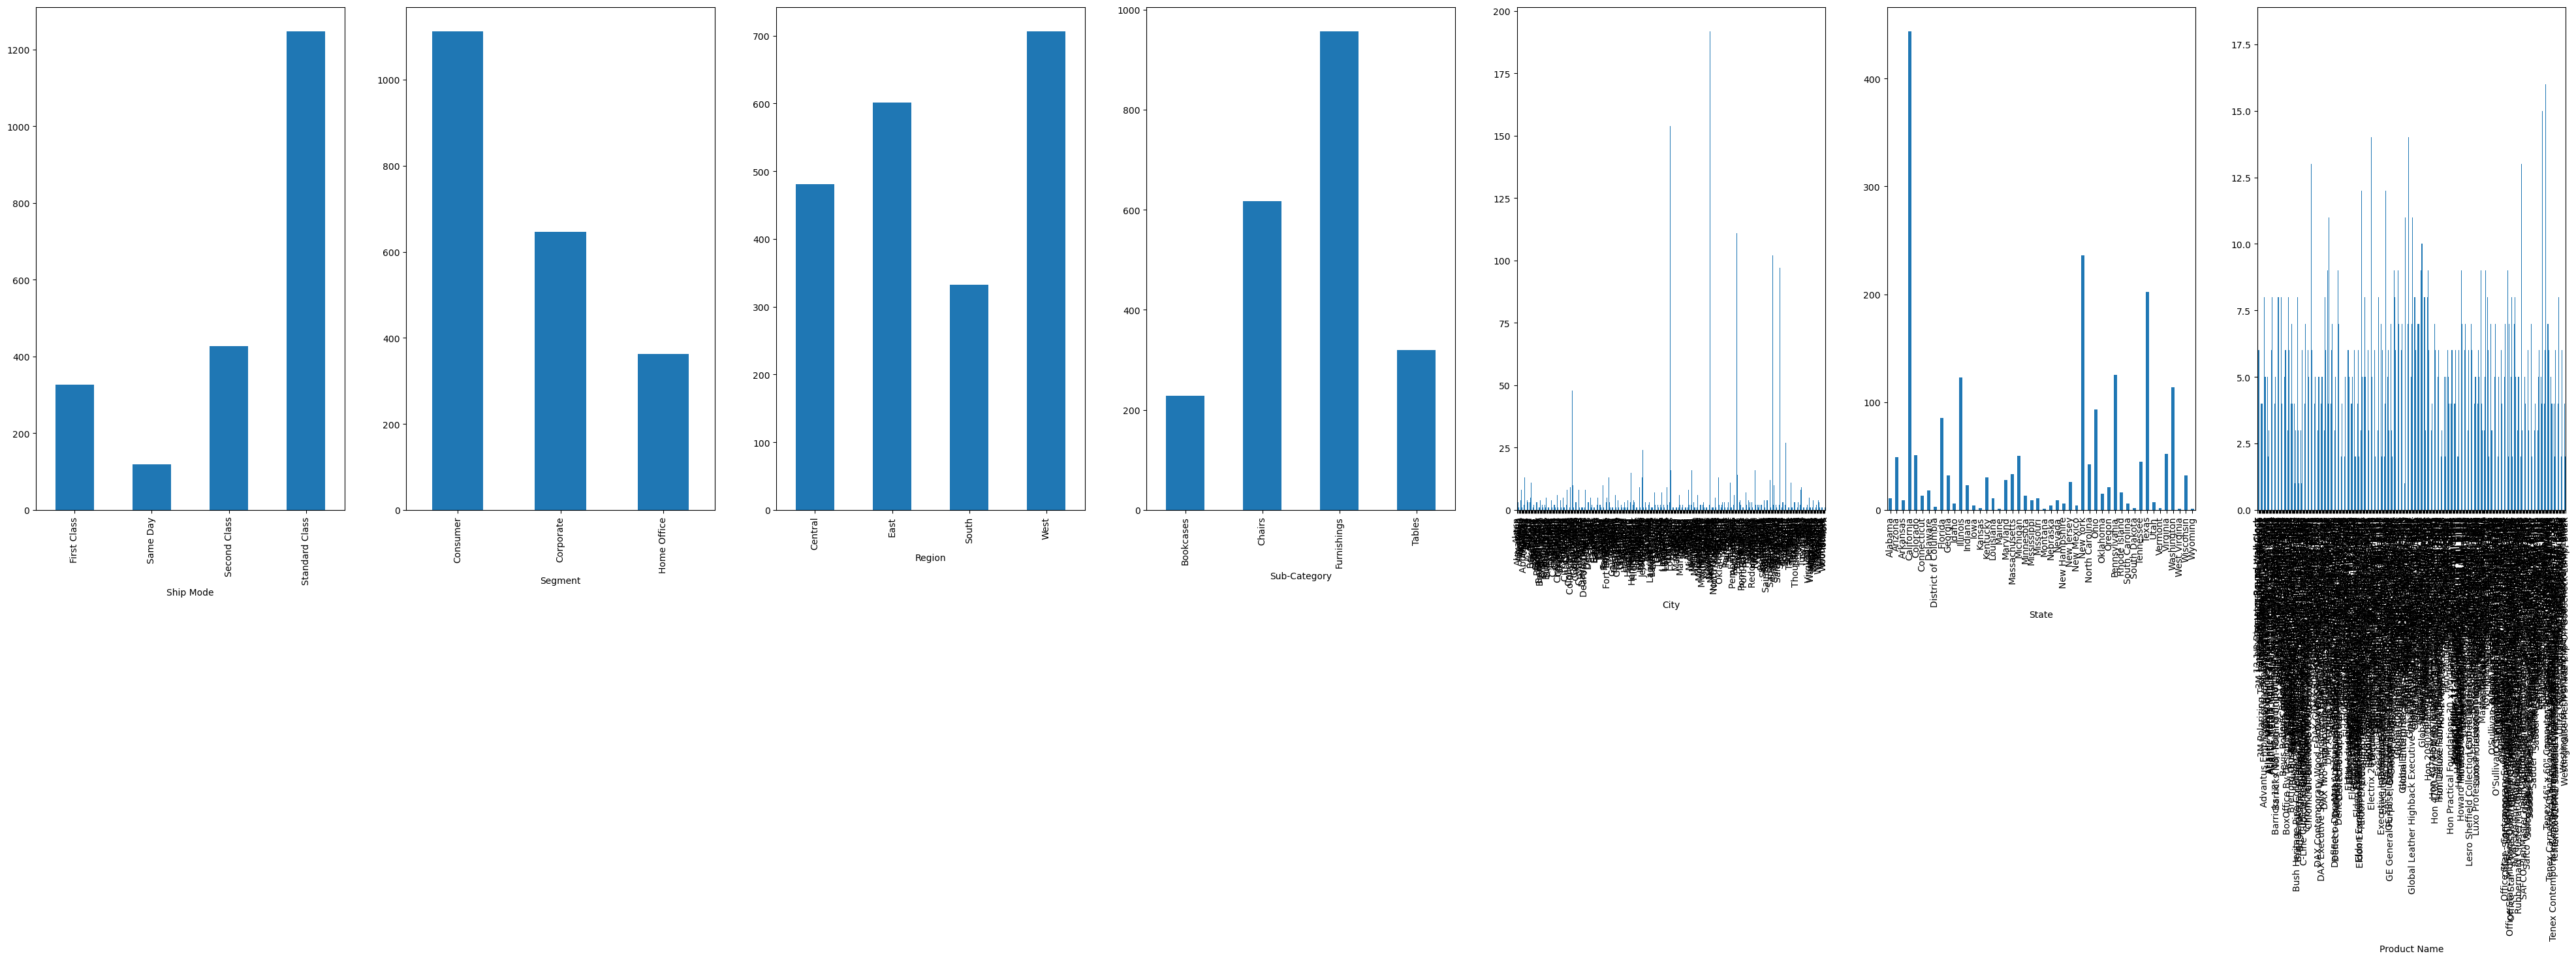

In [199]:

def BarPlotCharts(inpData,columns):
    %matplotlib inline
    import matplotlib.pyplot as plt
    fig, subplots=plt.subplots(nrows=1,ncols=len(columns),figsize=(50,10))
    for cols, i in zip(columns, range(len(columns))):
        inpData.groupby(cols).size().plot(kind='bar',ax=subplots[i])

CategoricalCols=['Ship Mode', 'Segment', 'Region','Sub-Category','City', 'State', 'Product Name']
BarPlotCharts(inpData=FurnitureSalesData,columns= CategoricalCols ) 



Outlier Treatment:

array([[<Axes: title={'center': 'Sales'}>]], dtype=object)

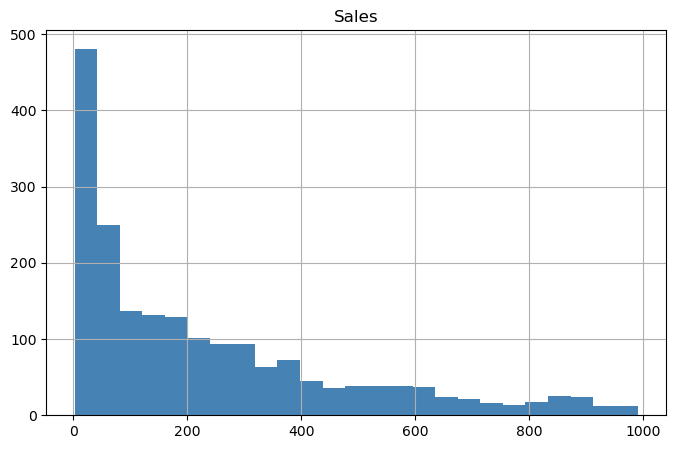

In [135]:
FurnitureSalesData.hist(['Sales'],figsize=(8,5),bins=25,color="steelblue")

In [136]:
FurnitureSalesData['Sales'] .sort_values(ascending=False).head(10)

443     991.7640
657     981.3720
312     977.2920
1010    975.9200
1016    975.9200
1347    974.9880
916     971.5000
1096    966.7000
671     963.1360
2       957.5775
Name: Sales, dtype: float64

In [137]:
FurnitureSalesData['Sales'][FurnitureSalesData['Sales'] >2065].sort_values(ascending=False).count()

0

In [138]:
FurnitureSalesData['Sales'][FurnitureSalesData['Sales'] <2065].sort_values(ascending=False).head(10)

443     991.7640
657     981.3720
312     977.2920
1010    975.9200
1016    975.9200
1347    974.9880
916     971.5000
1096    966.7000
671     963.1360
2       957.5775
Name: Sales, dtype: float64

In [166]:
FurnitureSalesData['Sales'][FurnitureSalesData['Sales'] >=2065]=2065 

C:\Users\Siddhali\AppData\Local\Temp\ipykernel_24048\1420350222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FurnitureSalesData['Sales'][FurnitureSalesData['Sales'] >=2065]=2065


array([[<Axes: title={'center': 'Sales'}>]], dtype=object)

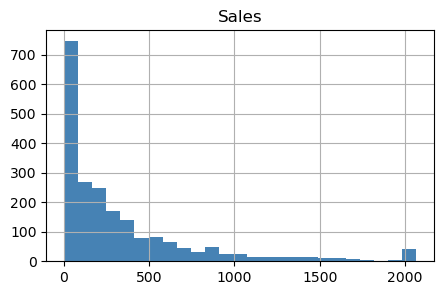

In [200]:
FurnitureSalesData.hist(['Sales'],figsize=(5,3),bins=25,color="steelblue")  

No need of Missing Values Treatment

Visual Correlation Anlaysis

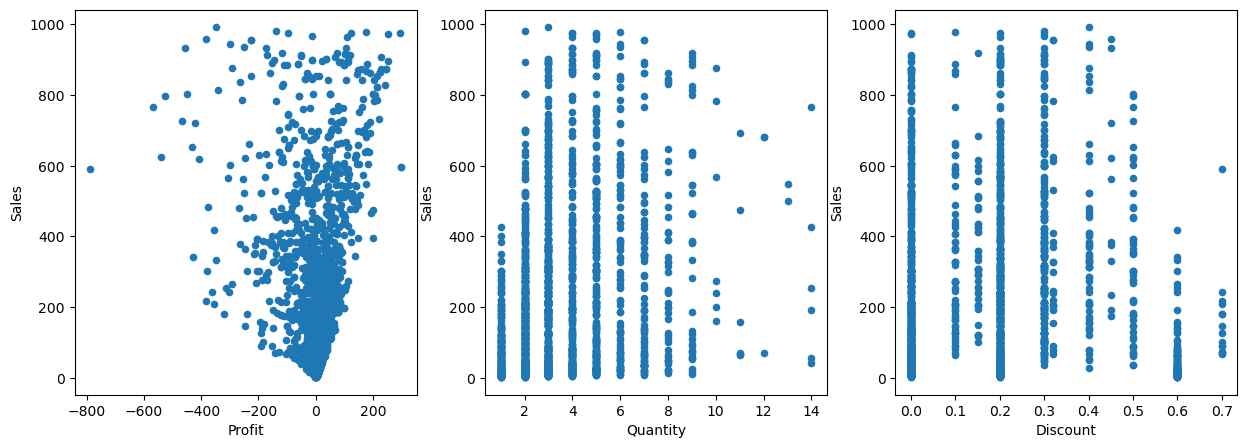

In [141]:
ContinousVar=[ 'Profit','Quantity', 'Discount']
%matplotlib inline
import matplotlib.pyplot as plt 
fig, subplots=plt.subplots(nrows=1,ncols=len(ContinousVar), figsize=(30,20))
for cols , i in zip(ContinousVar,range(len(ContinousVar))):
    FurnitureSalesData.plot.scatter(x=cols,y='Sales',figsize=(15,5),ax=subplots[i])

Continous Statistical Analysis

In [142]:
ContinousVar=[ 'Sales','Profit','Quantity', 'Discount'] 
corrdataanalysis=FurnitureSalesData[ContinousVar].corr() 
corrdataanalysis 

,Sales,Profit,Quantity,Discount
Sales,1.000000,-0.007610,0.269133,0.047968
Profit,-0.007610,1.000000,-0.016117,-0.589329
Quantity,0.269133,-0.016117,1.000000,0.007277
Discount,0.047968,-0.589329,0.007277,1.000000


No columns are selected for Machine Learning

Visual Analysis for Categorical Variable 

In [143]:
FurnitureSalesData.columns 

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'Country', 'City',
       'State', 'Region', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [162]:
from datetime import datetime
def convert_date_format(date_str): 
    if '-' in date_str:
        # Assuming the format is dd-mm-yyyy
        try:
            date_obj = datetime.strptime(date_str, "%d-%m-%Y")
        except ValueError:
            return "Invalid date format"
    elif '/' in date_str:
        # Assuming the format is mm/dd/yyyy
        try:
            date_obj = datetime.strptime(date_str, "%m/%d/%Y")
        except ValueError:
            return "Invalid date format"
    else:
        return "Unsupported date format"

    return date_obj.strftime("%m-%d-%Y")  # Converting to yyyy-mm-dd

In [163]:
FurnitureSalesData['Order Date']=FurnitureSalesData['Order Date'].apply(lambda x : convert_date_format(x))
FurnitureSalesData['Ship Date']=FurnitureSalesData['Ship Date'].apply(lambda x : convert_date_format(x))  

In [164]:
FurnitureSalesData['Order Date']=pd.to_datetime(FurnitureSalesData['Order Date'],format='%m-%d-%Y')
FurnitureSalesData['Ship Date']=pd.to_datetime(FurnitureSalesData['Ship Date'],format='%m-%d-%Y') 

In [169]:
FurnitureSalesData.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    2121 non-null   datetime64[ns]
 1   Ship Date     2121 non-null   datetime64[ns]
 2   Ship Mode     2121 non-null   object        
 3   Segment       2121 non-null   object        
 4   Country       2121 non-null   object        
 5   City          2121 non-null   object        
 6   State         2121 non-null   object        
 7   Region        2121 non-null   object        
 8   Category      2121 non-null   object        
 9   Sub-Category  2121 non-null   object        
 10  Product Name  2121 non-null   object        
 11  Sales         2121 non-null   float64       
 12  Quantity      2121 non-null   int64         
 13  Discount      2121 non-null   float64       
 14  Profit        2121 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int6

In [170]:
FurnitureSalesData['Order_Month']=FurnitureSalesData['Order Date'].dt.month
FurnitureSalesData['Order_Day']=FurnitureSalesData['Order Date'].dt.day
FurnitureSalesData['Ship_Month']=FurnitureSalesData['Ship Date'].dt.month
FurnitureSalesData['Ship_Day']=FurnitureSalesData['Ship Date'].dt.day  

In [149]:
FurnitureSalesData.columns 

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'Country', 'City',
       'State', 'Region', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Order_Month', 'Order_Day',
       'Ship_Month', 'Ship_Day'],
      dtype='object')

C:\Users\Siddhali\AppData\Local\Temp\ipykernel_24048\786365983.py:21: UserWarning: Glyph 136 (\x88) missing from current font.
  plt.tight_layout()
C:\Users\Siddhali\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 136 (\x88) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


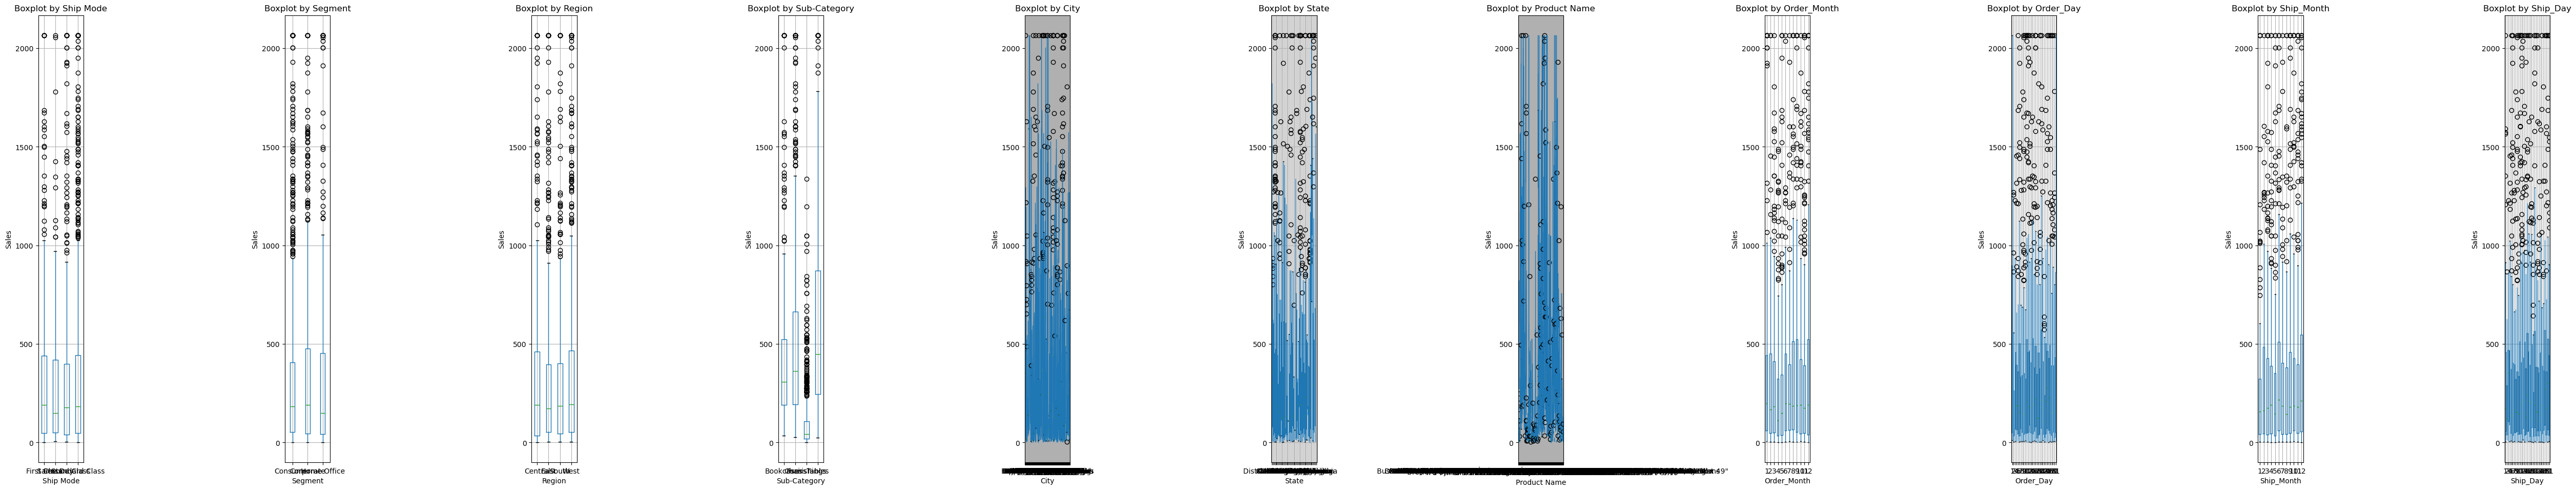

In [171]:
import matplotlib.pyplot as plt

CategoricalCols = ['Ship Mode', 'Segment', 'Region', 'Sub-Category', 'City', 'State', 'Product Name', 'Order_Month', 'Order_Day',
       'Ship_Month', 'Ship_Day']

# Create a subplot for each categorical column 
fig, subplots = plt.subplots(nrows=1, ncols=len(CategoricalCols), figsize=(50, 10))

# Ensure subplots is iterable
if len(CategoricalCols) == 1:
    subplots = [subplots]

# Plot boxplots for each categorical column
for col, ax in zip(CategoricalCols, subplots):
    FurnitureSalesData.boxplot(column="Sales", by=col, vert=True, ax=ax)
    ax.set_title(f'Boxplot by {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Sales')

# Adjust layout
plt.tight_layout()
plt.suptitle('')  # Remove the default title to avoid overlap
plt.show()

In [172]:
CategoricalColumns=['Ship Mode', 'Segment', 'Region', 'Sub-Category', 'City', 'State', 'Product Name', 'Order_Month', 'Order_Day',
       'Ship_Month', 'Ship_Day']
TargetVariable="Sales"
def FunctionAnova(inpData, TargetVariable, CategoricalColumns):   
    from scipy.stats import f_oneway
    SelectedPredictors=[]  
    for predictor in CategoricalColumns:
        CategoryGroupLists=FurnitureSalesData.groupby(predictor)[TargetVariable].apply(list) 
        AnovaResults=f_oneway(*CategoryGroupLists) 
        if AnovaResults[1]<0.05:
            print(predictor," is Correlated with ", TargetVariable, " P value is ",AnovaResults[1] )
            SelectedPredictors.append(predictor)
        else:
            print(predictor," is not Correlated with ", TargetVariable, " P value is ",AnovaResults[1] ) 
    return(SelectedPredictors) 

In [152]:
FunctionAnova(FurnitureSalesData, TargetVariable, CategoricalColumns)    

Ship Mode  is not Correlated with  Sales  P value is  0.8451224736707479
Segment  is not Correlated with  Sales  P value is  0.6168987857455114
Region  is not Correlated with  Sales  P value is  0.5620827436930665
Sub-Category  is Correlated with  Sales  P value is  1.432936974632001e-181
City  is not Correlated with  Sales  P value is  0.9644416281212193
State  is not Correlated with  Sales  P value is  0.8054636829431573
Product Name  is Correlated with  Sales  P value is  4.4006479043852313e-243
Order_Month  is not Correlated with  Sales  P value is  0.3626706258387509
Order_Day  is not Correlated with  Sales  P value is  0.8035332591213389
Ship_Month  is not Correlated with  Sales  P value is  0.12765871697592235
Ship_Day  is not Correlated with  Sales  P value is  0.2636856391248588


['Sub-Category', 'Product Name']

Selected Columns for Machine Learning=['Sub-Category', 'State', 'Product Name','Order_Day']  

In [153]:
DataForML.nunique()

Ship Mode          4
Segment            3
Region             4
Sub-Category       4
Quantity          14
Discount          11
Profit          1777
Order_Month       12
Order_Day         31
Ship_Month        12
Ship_Day          31
dtype: int64

In [173]:
SelectedColumns=['Ship Mode', 'Segment', 'Region', 'Sub-Category', 'Quantity', 'Discount', 'Profit', 'Order_Month', 'Order_Day', 'Ship_Month', 'Ship_Day']

In [174]:
DataForML=FurnitureSalesData[SelectedColumns]  

In [156]:
DataForML.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1952 entries, 0 to 2120
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     1952 non-null   object 
 1   Segment       1952 non-null   object 
 2   Region        1952 non-null   object 
 3   Sub-Category  1952 non-null   object 
 4   Quantity      1952 non-null   int64  
 5   Discount      1952 non-null   float64
 6   Profit        1952 non-null   float64
 7   Order_Month   1952 non-null   int32  
 8   Order_Day     1952 non-null   int32  
 9   Ship_Month    1952 non-null   int32  
 10  Ship_Day      1952 non-null   int32  
dtypes: float64(2), int32(4), int64(1), object(4)
memory usage: 152.5+ KB


In [175]:
DataForML.to_pickle("DataForML.pkl")  

In [176]:
import pandas as pd
DataForML= pd.read_pickle("DataForML.pkl")  

In [177]:
DataForML.head() 

,Ship Mode,Segment,Region,Sub-Category,Quantity,Discount,Profit,Order_Month,Order_Day,Ship_Month,Ship_Day
0,Second Class,Consumer,South,Bookcases,2,0.00,41.9136,8,11,11,11
1,Second Class,Consumer,South,Chairs,3,0.00,219.5820,8,11,11,11
2,Standard Class,Consumer,South,Tables,5,0.45,-383.0310,11,10,10,18
3,Standard Class,Consumer,West,Furnishings,7,0.00,14.1694,9,6,6,14
4,Standard Class,Consumer,West,Tables,9,0.20,85.3092,9,6,6,14


In [178]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder() 
columns=['Ship Mode','Segment','Region', 'Sub-Category'] #['speed', 'hd', 'screen', 'cd', 'premium']
for cols in columns:
    DataForML[cols] = label_encoder.fit_transform(DataForML[cols]) 

In [179]:
DataForML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     2121 non-null   int32  
 1   Segment       2121 non-null   int32  
 2   Region        2121 non-null   int32  
 3   Sub-Category  2121 non-null   int32  
 4   Quantity      2121 non-null   int64  
 5   Discount      2121 non-null   float64
 6   Profit        2121 non-null   float64
 7   Order_Month   2121 non-null   int32  
 8   Order_Day     2121 non-null   int32  
 9   Ship_Month    2121 non-null   int32  
 10  Ship_Day      2121 non-null   int32  
dtypes: float64(2), int32(8), int64(1)
memory usage: 116.1 KB


In [184]:
DataForML.head()

,Ship Mode,Segment,Region,Sub-Category,Quantity,Discount,Profit,Order_Month,Order_Day,Ship_Month,Ship_Day
0,2,0,2,0,2,0.00,41.9136,8,11,11,11
1,2,0,2,1,3,0.00,219.5820,8,11,11,11
2,3,0,2,3,5,0.45,-383.0310,11,10,10,18
3,3,0,3,2,7,0.00,14.1694,9,6,6,14
4,3,0,3,3,9,0.20,85.3092,9,6,6,14


In [185]:
DataForML_Numeric=DataForML

In [186]:
DataForML_Numeric["Sales"] = FurnitureSalesData["Sales"]

In [188]:
Predictors=DataForML_Numeric.columns[:-1] 

In [189]:
Predictors=['Ship Mode', 'Segment', 'Region', 'Sub-Category', 'Quantity',
       'Discount', 'Profit', 'Order_Month', 'Order_Day', 'Ship_Month',
       'Ship_Day']

In [206]:
# Separate Target Variable and Predictor Variables
TargetVariable='Sales' 

# Simple Linear Regression (only one predictor) 
# Predictors=[ 'Age']
X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values
# Polynomial Regression
# Uncomment below lines if you want to perform polynomial regression
#from sklearn.preprocessing import PolynomialFeatures
#poly = PolynomialFeatures(degree = 2, include_bias=False) 
#X = poly.fit_transform(X)
#Predictors=poly.get_feature_names_out() 

# Split the data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=41)

# Quick check on the shapes of train and test
print(X_train.shape) 
print(y_train.shape) 
print(X_test.shape)
print(y_test.shape)  

(1696, 5)
(1696,)
(425, 5)
(425,)


In [207]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()
# Printing all the parameters of Linear regression
print(RegModel)
# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
# Taking the standardized values to original scale
from sklearn import metrics 
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train))) 
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
# Printing some sample values of prediction
prediction=LREG.predict(X_test)
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
print(TestingDataResults.head())    
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Sales']-TestingDataResults['PredictedSales']))/TestingDataResults['Sales'])
# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable, 'APE']].head())

MAPE=np.mean(TestingDataResults['APE']) 
MedianMAPE=np.median(TestingDataResults['APE']) 

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=4, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))   

LinearRegression()
R2 Value: 0.24230390753797593

##### Model Validation and Accuracy Calculations ##########
   Sub-Category  Quantity  Discount    Profit  Ship_Day    Sales  \
0           2.0       3.0       0.2    4.3680      17.0   24.960   
1           3.0       2.0       0.4 -120.2940       9.0  481.176   
2           1.0       2.0       0.2    2.8196      21.0  225.568   
3           2.0      12.0       0.0   31.0992      12.0   70.680   
4           0.0       7.0       0.7 -786.7440      28.0  590.058   

   PredictedSales  
0           257.0  
1            81.0  
2           213.0  
3           963.0  
4           161.0  
     Sales  PredictedSales          APE
0   24.960           257.0   929.647436
1  481.176            81.0    83.166243
2  225.568           213.0     5.571712
3   70.680           963.0  1262.478778
4  590.058           161.0    72.714547
Mean Accuracy on test data: -326.40102285336525
Median Accuracy on test data: 29.05542022894079

Accuracy values for 10-f

In [76]:
DataForML_Numeric.columns 

Index(['Ship Mode', 'Segment', 'Region', 'Sub-Category', 'Quantity',
       'Discount', 'Profit', 'Order_Month', 'Order_Day', 'Ship_Month',
       'Ship_Day', 'Sales'],
      dtype='object')

Decision Tree Model

In [209]:
DataForML_Numeric['Sales_t']=np.log1p(DataForML_Numeric['Sales']) 

In [210]:
Predictors=['Sub-Category', 'Quantity',
       'Discount', 'Profit', 'Ship_Day'] 
TargetVariable='Sales_t'
X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=41)

DecisionTreeRegressor(max_depth=8)
R2 Value: 0.912181630692628

##### Model Validation and Accuracy Calculations ##########
    Sales_t  PredictedSales_t
0  3.256557               3.0
1  6.178309               6.0
2  5.423045               5.0
3  4.272212               5.0
4  6.381914               5.0
Mean Accuracy on test data: 89.05873143986503
Median Accuracy on test data: 92.12183602629294

Accuracy values for 10-fold Cross Validation:
 [90.46038129 91.29663743 90.18625373 90.4045276 ]

Final Average Accuracy of the model: 90.59


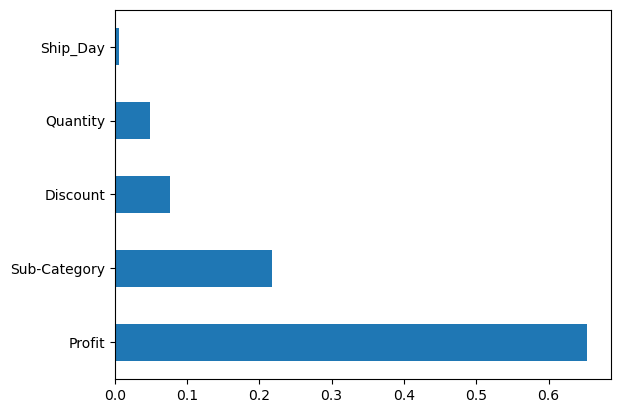

In [211]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor 
RegModel = DecisionTreeRegressor(max_depth= 8 , min_samples_split=2) 
# Good Range of hyper parameter Max_depth = 2 to 20

# Printing all the parameters of Decision Tree 
print(RegModel)   

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
prediction=DT.predict(X_test)
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Sales_t']-TestingDataResults['PredictedSales_t']))/TestingDataResults['Sales_t'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=4, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))